In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from pandas.tools.plotting import autocorrelation_plot
# from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, roc_curve
from sklearn.metrics import jaccard_similarity_score
import seaborn as sns
import datetime
plt.style.use('ggplot')
from bisect import bisect
import re

pd.options.display.max_columns = 999

In [5]:
lst_f_featureimportance = glob.glob("log_assess/*.csv")
lst_f_featureimportance_actual = glob.glob("log_assess/actual_model_performance/*.csv")
lst_f_performance = glob.glob("log_assess/actual_model_performance/*.txt")
lst_f_res = glob.glob("result_assess/actual_model_result/Results*.csv")
lst_f_roc = glob.glob("roc_assess/*.csv")
lst_f_input = glob.glob("input_data/test/*.csv")
lst_f_actual_res = glob.glob("result_assess/actual_model_result/merged_*.csv")

In [16]:
fontsize = 20

In [4]:
# ###2nd run
# lst_f_featureimportance_2nd = glob.glob("backup/log_assess/*.csv") 
# lst_f_performance_2nd = glob.glob("backup/log_assess/*.txt")
# lst_f_res_2nd = glob.glob("backup/result_assess/*.csv")
# lst_f_roc_2nd = glob.glob("backup/roc_assess/*.csv")

## 1. Accuracy/Kappa/AUC/Recall/F1

### Value tendency

In [1029]:
lst_performance = []
for filename in lst_f_performance:
    with open(filename) as f:
        lst_performance.append([i for i in f.read().split("\n") if i.strip()])

dict_performance = {}
# dict_performance['accuracy'] = []
# dict_performance['kappa'] = []
dict_performance['auc'] = []
# dict_performance['recall'] = []
# dict_performance['precision'] = []
dict_performance['f1'] = []
dict_performance['date'] = []

for idx, p in enumerate(lst_performance):
    for em in p:
        if 'AUC' in em:
            auc = float(em[em.find('=')+2:].strip())
        if 'f1' in em:
            dict_performance['date'].append(lst_f_performance[idx])
            dict_performance['f1'].append(float(em[em.find('=')+2:].strip()))
            dict_performance['auc'].append(auc)
                
#         if 'Accuracy' in em:
#             dict_performance['accuracy'].append(float(em[em.find('=')+2:].strip()))
#         if 'kappa' in em:
#             dict_performance['kappa'].append(float(em[em.find('=')+2:].strip()))

#         if 'recall' in em:
#             dict_performance['recall'].append(float(em[em.find('=')+2:].strip()))
#         if 'precision' in em:
#             dict_performance['precision'].append(float(em[em.find('=')+2:].strip()))
        
                

df_performance = pd.DataFrame(dict_performance)

def getDate(x):
    return x.replace("log_assess/actual_model_performance/ModelPerformance_", "").replace(".txt","")[:10]

df_performance['date'] = pd.to_datetime(df_performance['date'].apply(lambda x: getDate(x)))
df_performance = df_performance.sort_values(by='date').reset_index(drop=True)

In [6]:
### 2nd run
# lst_performance_2nd = []
# for filename in lst_f_performance_2nd:
#     with open(filename) as f:
#         lst_performance_2nd.append([i for i in f.read().split("\n") if i.strip()])

# dict_performance_2nd = {}
# dict_performance_2nd['accuracy'] = []
# dict_performance_2nd['kappa'] = []
# dict_performance_2nd['auc'] = []
# dict_performance_2nd['recall'] = []
# dict_performance_2nd['precision'] = []
# dict_performance_2nd['f1'] = []

# for p in lst_performance_2nd:
#     for em in p:
#         if 'Accuracy' in em:
#             dict_performance_2nd['accuracy'].append(float(em[em.find('=')+2:].strip()))
#         if 'kappa' in em:
#             dict_performance_2nd['kappa'].append(float(em[em.find('=')+2:].strip()))
#         if 'AUC' in em:
#             dict_performance_2nd['auc'].append(float(em[em.find('=')+2:].strip()))
#         if 'recall' in em:
#             dict_performance_2nd['recall'].append(float(em[em.find('=')+2:].strip()))
#         if 'precision' in em:
#             dict_performance_2nd['precision'].append(float(em[em.find('=')+2:].strip()))
#         if 'f1' in em:
#             dict_performance_2nd['f1'].append(float(em[em.find('=')+2:].strip()))

# df_performance_2nd = pd.DataFrame(dict_performance_2nd)

# dict_date_2nd = {}
# dict_date_2nd['date'] = [fn.replace("backup/log_assess/ModelPerformance_", "").replace(".txt","") for fn in lst_f_performance_2nd]
# df_date_2nd = pd.DataFrame(dict_date_2nd)
# df_performance_2nd = df_performance_2nd.join(df_date_2nd)

# df_performance_2nd['date'] = pd.to_datetime(df_performance_2nd['date'])
# df_performance_2nd = df_performance_2nd.sort_values(by='date').reset_index(drop=True)
# # df_performance.set_index(['date'],inplace=True)

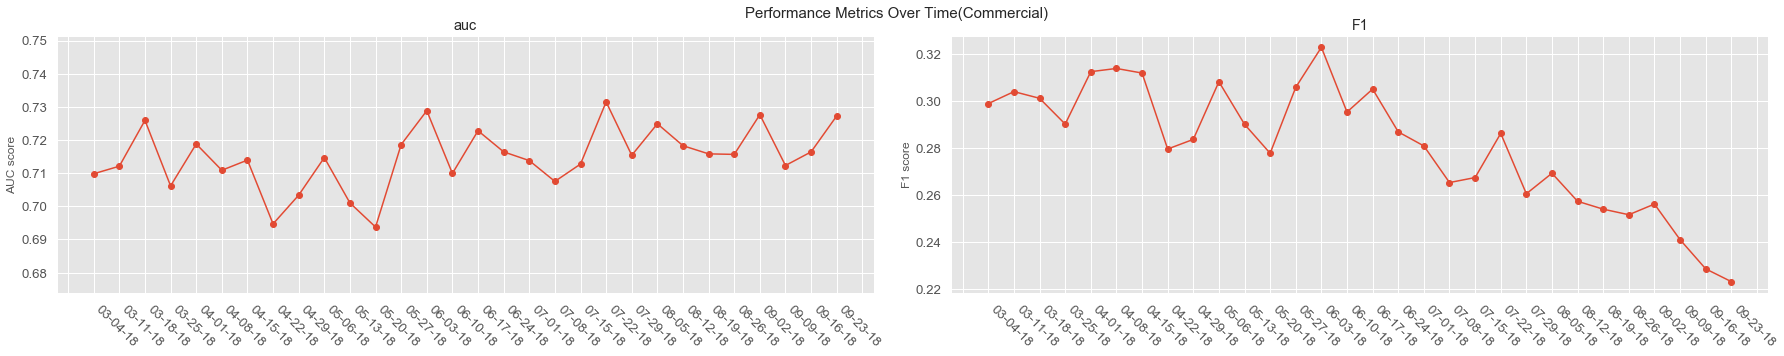

In [1129]:
kappa_kdd = 0.33
auc_kdd = 0.75
recall_kdd = 0.50
precision_kdd = 0.26
post_deploy = 'Actual performance over time'
pre_deploy = "Initial trained model"
lst_date = [""] + df_performance['date'].dt.strftime('%m-%d-%y').tolist() + [""]

fig, axes = plt.subplots(1,2,figsize=(25,5))
ax = axes.flat
# ax[0].plot(df_performance['accuracy'], marker='o')
# # ax[0].plot(df_performance_2nd['date'], df_performance_2nd['accuracy'], marker='o')
# ax[0].set_title("accuracy")
# # ax[0].legend(['1st run','2nd run'])

# ax[0].plot(df_performance['date'], df_performance['kappa'], marker='o')
# ax[0].plot(df_performance['date'], np.full((df_performance.shape[0]), kappa_kdd), ls='dashed', color = 'r')
# # ax[1].plot(df_performance_2nd['date'], df_performance_2nd['kappa'], marker='o')
# ax[0].set_title("kappa")
# max_lim = max(df_performance['kappa'].max(), kappa_kdd)+0.03
# min_lim = min(df_performance['kappa'].min(), kappa_kdd)-0.02
# ax[0].set_ylim([min_lim, max_lim])
# # ax[1].legend(['1st run','2nd run'])

ax[0].plot(df_performance['date'], df_performance['auc'], marker='o')
# ax[0].plot(df_performance['date'], np.full((df_performance.shape[0]), auc_kdd), ls='dashed', color = 'r')
# ax[2].plot(df_performance_2nd['date'], df_performance_2nd['auc'], marker='o')
ax[0].set_title("auc")
max_lim = df_performance['auc'].max() + 0.02
min_lim = df_performance['auc'].min() - 0.02
ax[0].set_ylim([min_lim, max_lim])
ax[0].set_ylabel("AUC score")

# max_lim = max(df_performance['auc'].max(), auc_kdd)+0.02
# min_lim = min(df_performance['auc'].min(), auc_kdd)-0.02
# ax[2].legend(['1st run','2nd run'])

# ax[2].plot(df_performance['date'], df_performance['recall'], marker='o')
# ax[2].plot(df_performance['date'], np.full((df_performance.shape[0]), recall_kdd), ls='dashed', color = 'r')
# # ax[3].plot(df_performance_2nd['date'], df_performance_2nd['recall'], marker='o')
# max_lim = max(df_performance['recall'].max(), recall_kdd)+0.03
# min_lim = min(df_performance['recall'].min(), recall_kdd)-0.02
# ax[2].set_ylim([min_lim, max_lim])
# ax[2].set_title("recall")
# # ax[3].legend(['1st run','2nd run'])

# ax[3].plot(df_performance['date'], df_performance['precision'], marker='o')
# ax[3].plot(df_performance['date'], np.full((df_performance.shape[0]), precision_kdd), ls='dashed', color = 'r')
# # ax[4].plot(df_performance_2nd['date'], df_performance_2nd['precision'], marker='o')
# max_lim = max(df_performance['precision'].max(), precision_kdd)+0.03
# min_lim = min(df_performance['precision'].min(), precision_kdd)-0.02
# ax[3].set_ylim([min_lim, max_lim])
# ax[3].set_title("precision")
# ax[4].legend(['1st run','2nd run'])

ax[1].plot(df_performance['date'], df_performance['f1'], marker='o')
# ax[5].plot(df_performance_2nd['date'], df_performance_2nd['f1'], marker='o')
ax[1].set_title("F1")
ax[1].set_ylabel("F1 score")
# ax[5].legend(['1st run','2nd run'])

for ax in fig.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=45)
#     ax.set_xticks(np.arange(len(df_performance['date'])))
#     ax.set_xticklabels(df_performance['date'].dt.strftime("%m-%d-%y"), rotation = -45, ha='left')
#     ax.legend([post_deploy, pre_deploy], loc = 'upper left')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=SU))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
    ax.xaxis.set_tick_params(rotation=-45)
    ax.set_xticklabels(lst_date, ha='left')
    
fig.suptitle("Performance Metrics Over Time(Commercial)", fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("analysis_plotting/Performance Metrics Over Time_Commercial.pdf")

### Mean/std tendency

In [1116]:
df_statistic = pd.DataFrame()
for col in df_performance:
    if col in ['accuracy', 'auc', 'f1', 'kappa', 'precision' ,'recall']:
        df_statistic['mean_%s'%col] = df_performance[col].expanding().mean()
        df_statistic['std_%s'%col] = df_performance[col].expanding().std()
        
df_statistic['date'] = df_performance['date']
df_statistic = df_statistic.iloc[1:,:].reset_index(drop=True)
label_time_window = pd.Series(["over %d week"%i for i in range(1,df_performance.shape[0])], name='time window')
df_statistic = pd.concat([df_statistic,label_time_window], axis=1)

In [62]:
# #### 2nd run ###
# df_statistic_2nd = pd.DataFrame()
# for col in df_performance_2nd:
#     if col in ['accuracy', 'auc', 'f1', 'kappa', 'precision' ,'recall']:
#         df_statistic_2nd['mean_%s'%col] = df_performance_2nd[col].expanding().mean()
#         df_statistic_2nd['std_%s'%col] = df_performance_2nd[col].expanding().std()
        
# df_statistic_2nd['date'] = df_performance_2nd['date']
# df_statistic_2nd = df_statistic_2nd.iloc[1:,:].reset_index(drop=True)
# label_time_window_2nd = pd.Series(["over %d week"%i for i in range(1,21)], name='time window')
# df_statistic_2nd = pd.concat([df_statistic_2nd,label_time_window_2nd], axis=1)

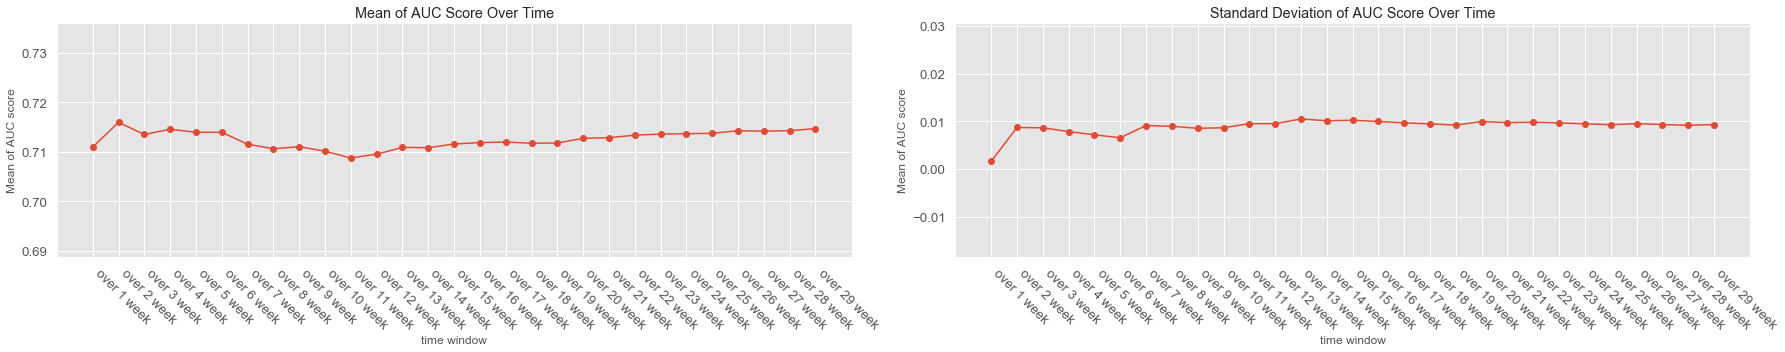

In [1432]:
fig, axes = plt.subplots(1,2,figsize=(25,5))
ax = axes.flat

df_statistic.plot(x='time window', y='mean_auc', ax = ax[0], marker='o', legend=False)
ax[0].set_title("Mean of AUC Score Over Time")
max_lim = df_statistic['mean_auc'].max() + 0.02
min_lim = df_statistic['mean_auc'].min() - 0.02
ax[0].set_ylim([min_lim, max_lim])

df_statistic.plot(x='time window', y='std_auc', ax = ax[1], marker='o', legend=False)
ax[1].set_title("Standard Deviation of AUC Score Over Time")
max_lim = df_statistic['std_auc'].max() + 0.02
min_lim = df_statistic['std_auc'].min() - 0.02
ax[1].set_ylim([min_lim, max_lim])

for ax in fig.axes:
    ax.set_xticks(np.arange(len(df_statistic['time window'])))
    ax.set_xticklabels(df_statistic['time window'], rotation = -45, ha='left')
    ax.set_ylabel("Mean of AUC score")
plt.tight_layout()
plt.savefig("analysis_plotting/Mean_STD of AUC Over Time_Commercial.pdf")

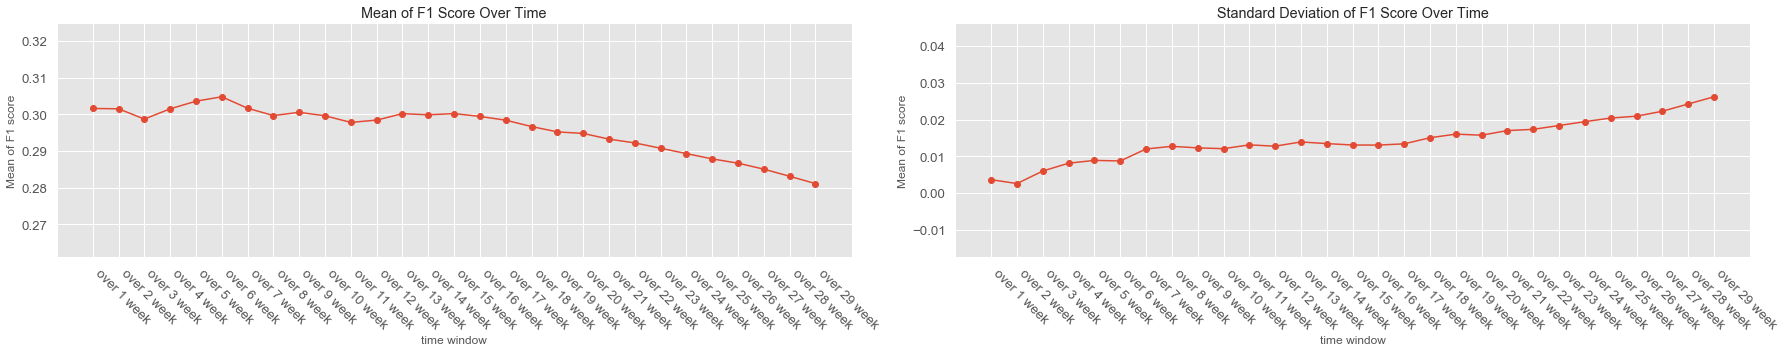

In [1134]:
fig, axes = plt.subplots(1,2,figsize=(25,5))
ax = axes.flat

df_statistic.plot(x='time window', y='mean_f1', ax = ax[0], marker='o', legend=False)
ax[0].set_title("Mean of F1 Score Over Time")
max_lim = df_statistic['mean_f1'].max() + 0.02
min_lim = df_statistic['mean_f1'].min() - 0.02
ax[0].set_ylim([min_lim, max_lim])

df_statistic.plot(x='time window', y='std_f1', ax = ax[1], marker='o', legend=False)
ax[1].set_title("Standard Deviation of F1 Score Over Time")
max_lim = df_statistic['std_f1'].max() + 0.02
min_lim = df_statistic['std_f1'].min() - 0.02
ax[1].set_ylim([min_lim, max_lim])

for ax in fig.axes:
    ax.set_xticks(np.arange(len(df_statistic['time window'])))
    ax.set_xticklabels(df_statistic['time window'], rotation = -45, ha='left')
    ax.set_ylabel("Mean of F1 score")
    
plt.tight_layout()
plt.savefig("analysis_plotting/Mean_STD of F1 Over Time_Commercial.pdf")

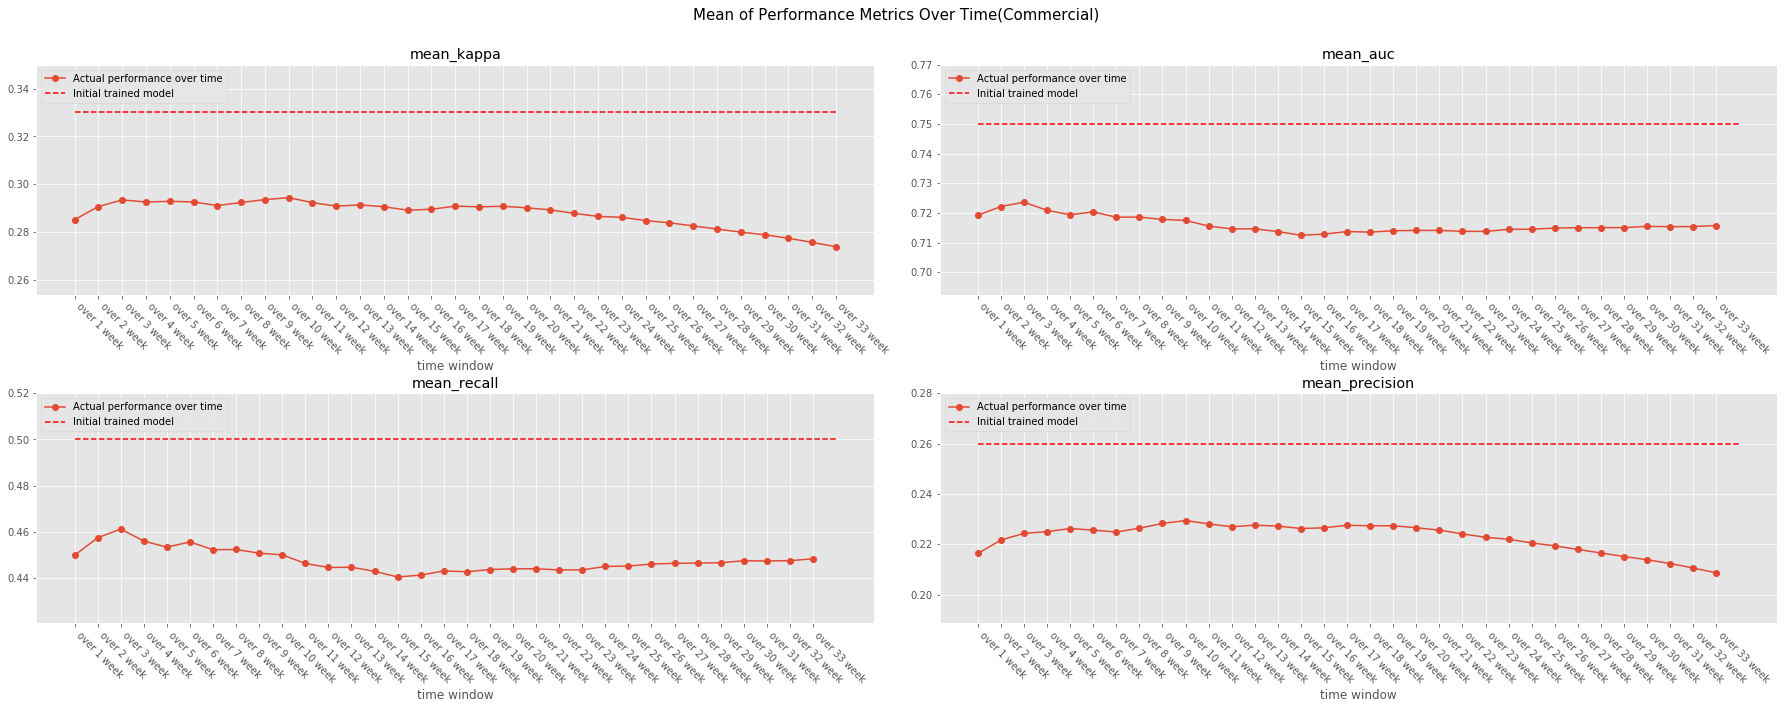

In [218]:
fig, axes = plt.subplots(2,2,figsize=(25,10))
ax = axes.flat
# df_statistic.plot(x='time window', y='mean_accuracy', ax = ax[0], marker='o')
# # df_statistic_2nd.plot(x='time window', y='mean_accuracy', ax = ax[0], marker='o')
# ax[0].set_title("mean_accuracy")

# ax[0].legend(['1st run','2nd run'])

df_statistic.plot(x='time window', y='mean_kappa', ax = ax[0], marker='o')
ax[0].plot(np.full((df_statistic.shape[0]), kappa_kdd), ls='dashed', color = 'r')
# df_statistic_2nd.plot(x='time window', y='mean_kappa', ax = ax[1], marker='o')
ax[0].set_title("mean_kappa")
max_lim = max(df_statistic['mean_kappa'].max(), kappa_kdd)+0.02
min_lim = min(df_statistic['mean_kappa'].min(), kappa_kdd)-0.02
ax[0].set_ylim([min_lim, max_lim])
# ax[1].legend(['1st run','2nd run'])


df_statistic.plot(x='time window', y='mean_auc', ax = ax[1], marker='o')
ax[1].plot(np.full((df_performance.shape[0]), auc_kdd), ls='dashed', color = 'r')
# df_statistic_2nd.plot(x='time window', y='mean_auc', ax = ax[2], marker='o')
ax[1].set_title("mean_auc")
max_lim = max(df_statistic['mean_auc'].max(), auc_kdd)+0.02
min_lim = min(df_statistic['mean_auc'].min(), auc_kdd)-0.02
ax[1].set_ylim([min_lim, max_lim])
# ax[2].legend(['1st run','2nd run'])


df_statistic.plot(x='time window', y='mean_recall', ax = ax[2], marker='o')
ax[2].plot(np.full((df_performance.shape[0]), recall_kdd), ls='dashed', color = 'r')
# df_statistic_2nd.plot(x='time window', y='mean_recall', ax = ax[3], marker='o')
max_lim = max(df_statistic['mean_recall'].max(), recall_kdd)+0.02
min_lim = min(df_statistic['mean_recall'].min(), recall_kdd)-0.02
ax[2].set_ylim([min_lim, max_lim])
ax[2].set_title("mean_recall")
# ax[3].legend(['1st run','2nd run'])


df_statistic.plot(x='time window', y='mean_precision', ax = ax[3], marker='o')
ax[3].plot(np.full((df_performance.shape[0]), precision_kdd), ls='dashed', color = 'r')
# df_statistic_2nd.plot(x='time window', y='mean_precision', ax = ax[4], marker='o')
max_lim = max(df_statistic['mean_precision'].max(), precision_kdd)+0.02
min_lim = min(df_statistic['mean_precision'].min(), precision_kdd)-0.02
ax[3].set_ylim([min_lim, max_lim])
ax[3].set_title("mean_precision")
# ax[4].legend(['1st run','2nd run'])

# df_statistic.plot(x='time window', y='mean_f1', ax = ax[5], marker='o')
# # df_statistic_2nd.plot(x='time window', y='mean_f1', ax = ax[5], marker='o')
# ax[5].set_title("mean_f1")
# ax[5].legend(['1st run','2nd run'])

for ax in fig.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=45)
    ax.set_xticks(np.arange(len(df_statistic['time window'])))
    ax.set_xticklabels(df_statistic['time window'], rotation = -45, ha='left')
    ax.legend([post_deploy, pre_deploy], loc = 'upper left')
fig.suptitle("Mean of Performance Metrics Over Time(Commercial)", fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("analysis_plotting/Mean of Performance Metrics Over Time_Commercial.pdf")

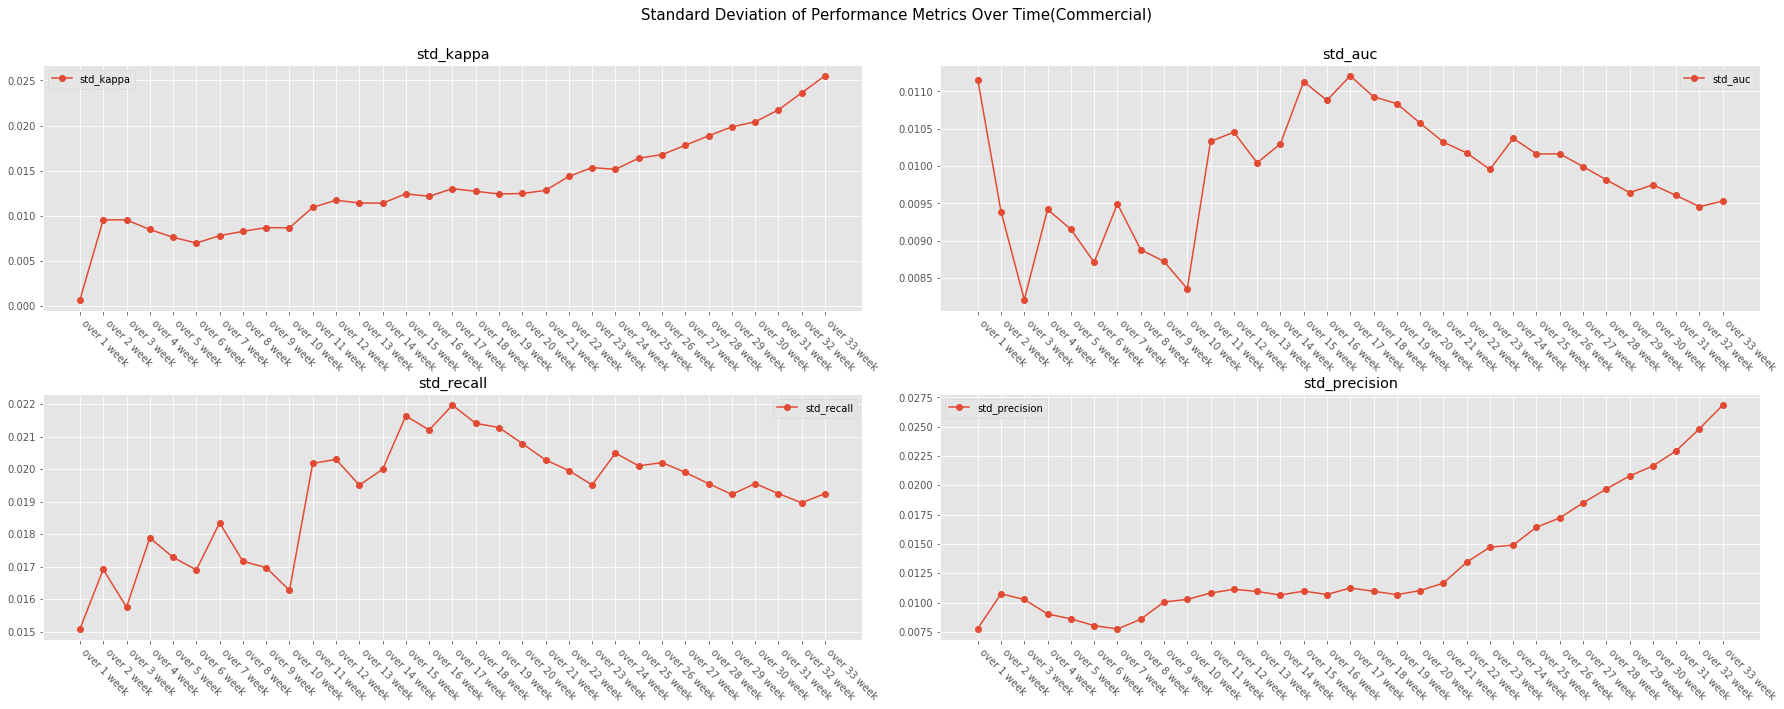

In [216]:
fig, axes = plt.subplots(2,2,figsize=(25,10))
ax = axes.flat
# df_statistic.plot(y='std_accuracy', ax = ax[0], marker='o')
# # df_statistic_2nd.plot(x='time window', y='std_accuracy', ax = ax[0], marker='o')
# ax[0].set_title("std_accuracy")
# ax[4].legend(['1st run','2nd run'])

df_statistic.plot(y='std_kappa', ax = ax[0], marker='o')
# df_statistic_2nd.plot(x='time window', y='std_kappa', ax = ax[1], marker='o')
ax[0].set_title("std_kappa")
# ax[0].legend(['1st run','2nd run'])

df_statistic.plot(y='std_auc', ax = ax[1], marker='o')
# df_statistic_2nd.plot(x='time window', y='std_auc', ax = ax[2], marker='o')
ax[1].set_title("std_auc")
# ax[1].legend(['1st run','2nd run'])

df_statistic.plot(y='std_recall', ax = ax[2], marker='o')
# df_statistic_2nd.plot(x='time window', y='std_recall', ax = ax[3], marker='o')
ax[2].set_title("std_recall")
# ax[2].legend(['1st run','2nd run'])

df_statistic.plot(y='std_precision', ax = ax[3], marker='o')
# df_statistic_2nd.plot(x='time window', y='std_precision', ax = ax[4], marker='o')
ax[3].set_title("std_precision")
# ax[3].legend(['1st run','2nd run'])

# df_statistic.plot(y='std_f1', ax = ax[5], marker='o')
# # df_statistic_2nd.plot(x='time window', y='std_f1', ax = ax[5], marker='o')
# ax[5].set_title("std_f1")
# ax[5].legend(['1st run','2nd run'])

for ax in fig.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=45)
    ax.set_xticks(np.arange(len(df_statistic['time window'])))
    ax.set_xticklabels(df_statistic['time window'], rotation = -45, ha='left')
fig.suptitle("Standard Deviation of Performance Metrics Over Time(Commercial)", fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("analysis_plotting/Std of Performance Metrics Over Time_Commercial.pdf")

### Empirical Risk Score

In [1516]:
lst_f_res.sort()
lst_f_input.sort()
lst_df_pred = []
for filename in lst_f_res:
    df_pred = pd.read_csv(filename)
    lst_df_pred.append(df_pred)
lst_df_truth = []
for filename in lst_f_input:
    df_truth = pd.read_csv(filename)
    lst_df_truth.append(df_truth)

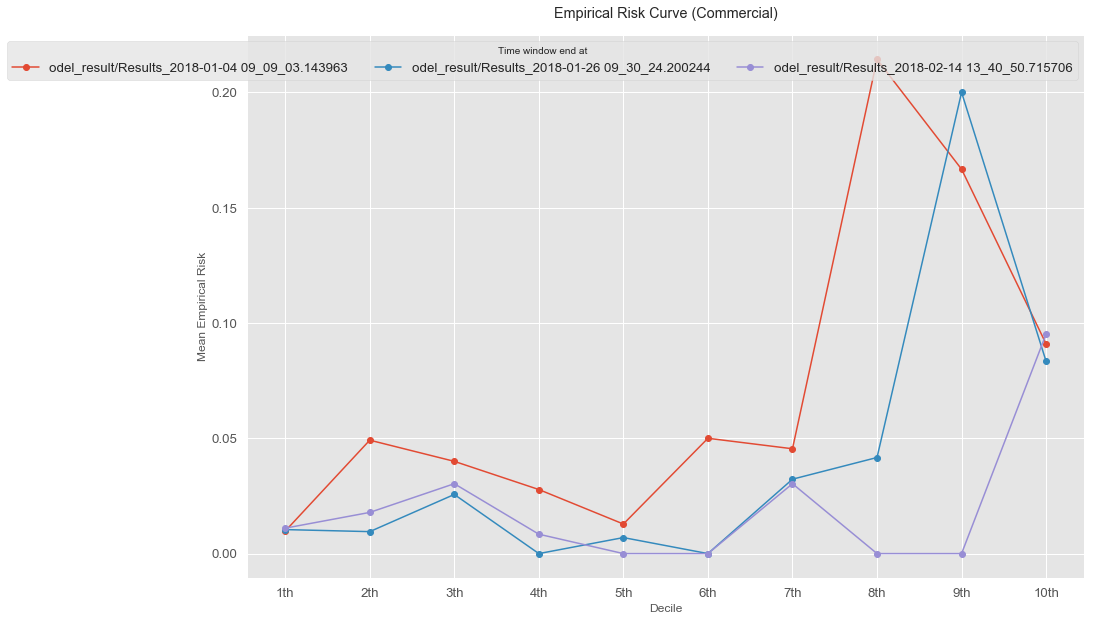

In [1517]:
def groupRiskScore(x):
    if (x <= 0.1):
        return 1
    elif (x <=0.2):
        return 2
    elif (x <=0.3):
        return 3
    elif (x <=0.4):
        return 4
    elif (x <=0.5):
        return 5
    elif (x <=0.6):
        return 6
    elif (x <=0.7):
        return 7
    elif (x <=0.8):
        return 8
    elif (x <=0.9):
        return 9
    else:
        return 10

fig, ax = plt.subplots(1,1,figsize=(15,10))
lst_name = []
for i in range(len(lst_f_res)):
    if (i%7!=0 or "2018-02" in curve_name):
        continue
    curve_name = (lst_f_res[i])[22:-4]
#     if "2018-09" not in curve_name and "2018-02" not in curve_name:
#         continue
    lst_name.append(curve_name)
    df_pred = lst_df_pred[i]
    df_truth = lst_df_truth[i]
    df_riskscore = pd.concat([df_pred['RiskScore'], df_truth['fire']], axis=1)
    df_riskscore['group'] = df_riskscore['RiskScore'].apply(lambda x: groupRiskScore(x))
    res = df_riskscore.groupby('group')['fire'].mean()
#     ax.bar(range(len(res)), res, width=0.2, capsize=5,
#            yerr = df_riskscore.groupby('group')['fire'].apply(lambda x: np.sqrt(x.mean()*(1-x.mean()) / x.count())))
#     df_riskscore['group'] = pd.qcut(df_riskscore['RiskScore'], q=10)
#     res = df_riskscore.groupby('group')['fire'].mean()
    ax.plot(list(res.index), res, marker='o')
#     break
    
# ax.set_xticks(range(len(res)))
# ax.set_xticklabels(["%.1f"%((i+1)*0.1) for i in range(len(res))])
ax.set_xticks(np.arange(1, 11, 1))
ax.set_xticklabels(["%dth"%i for i in ax.get_xticks()])
ax.set_title("Empirical Risk Curve (Commercial)", y=1.02)
ax.set_xlabel("Decile")
ax.set_ylabel("Mean Empirical Risk")
ax.legend(lst_name, title='Time window end at', ncol=3)
# plt.savefig("analysis_plotting/Empirical Risk Curve_Commercial.pdf")

### Actual empirical risk curve

In [1504]:
lst_df_pred_actual = []
for filename in lst_f_actual_res:
    df_pred_actual = pd.read_csv(filename)
    lst_df_pred_actual.append(df_pred_actual)

In [1509]:
def encode_income(df):
    lower_bound_income = [int(re.search(r'\$([0-9|,]+)', i).group(1).replace(",","")) for i in df.columns if "Estimate; Total:" in i and "$" in i]
    idx_poor_start = 3
    idx_rich_end = 3 + len(lower_bound_income)
    df['index_thres'] = df.apply(lambda x: bisect(lower_bound_income, x.Threshold), axis=1)
    df['idx_poor_end'] = df.apply(lambda x: int(idx_poor_start + x.index_thres - 1), axis=1)
    df['idx_rich_start'] = df.apply(lambda x: int(x.idx_poor_end), axis=1)
    df['poor_total'] = df.apply(lambda x: x[idx_poor_start:df.loc[x.name,'idx_poor_end']].sum(), axis=1)
    df['rich_total'] = df.apply(lambda x: x[df.loc[x.name,'idx_rich_start']:idx_rich_end].sum(), axis=1)
    df['income'] = df.apply(lambda x: 0 if x['poor_total'] >= x['rich_total'] else 1, axis=1)
    return df
def groupRiskScore(x):
    if (x <= 0.1):
        return 1
    elif (x <=0.2):
        return 2
    elif (x <=0.3):
        return 3
    elif (x <=0.4):
        return 4
    elif (x <=0.5):
        return 5
    elif (x <=0.6):
        return 6
    elif (x <=0.7):
        return 7
    elif (x <=0.8):
        return 8
    elif (x <=0.9):
        return 9
    else:
        return 10
def calculateStd(x):
    return (x.mean()*(1-x.mean()) / x.count())**0.5

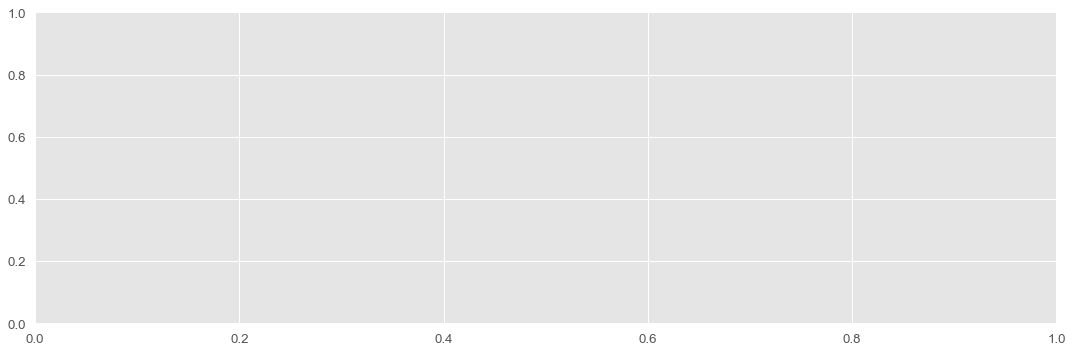

In [1495]:
pd.options.mode.chained_assignment = None 
bar_width = 0.3
lst_colors = ['r','b']
fig, axes = plt.subplots(2,1,figsize=(15,10))
lst_name = []

for i in range(len(lst_f_actual_res)):
    curve_name = (lst_f_actual_res[i]).replace("result_assess/actual_model_result/merged_threshold_", "").replace(".csv", "")
    if (curve_name == "March"):
        curve_name = "2018-03-04"
    else:
        curve_name = "2018-09-23"
    df_riskscore = lst_df_pred_actual[i]
    df_riskscore = df_riskscore.loc[:, ['RiskScore'] + ['Actual Fire'] + [i for i in df_riskscore.columns if "Estimate; Total:" in i and "$" in i]].rename(columns={'Actual Fire': 'fire'})
    df_riskscore.insert(2, 'Threshold', value=lst_df_pred_actual[i]['thresh'])
    df_riskscore = encode_income(df_riskscore)
    df_riskscore['group'] = df_riskscore['RiskScore'].apply(lambda x: groupRiskScore(x))
    
    df_riskscore_poor = df_riskscore[df_riskscore['income']==0]
    df_riskscore_rich = df_riskscore[df_riskscore['income']==1]
    
    res_poor = df_riskscore_poor.groupby('group')['fire'].mean()
    axes[i].bar(list(res_poor.index-bar_width/2), res_poor, width=bar_width, capsize=5,
           yerr = df_riskscore_poor.groupby('group')['fire'].apply(lambda x: calculateStd(x)))
    
    res_rich = df_riskscore_rich.groupby('group')['fire'].mean()
    axes[i].bar(list(res_rich.index+bar_width/2), res_rich, width=bar_width, capsize=5,
           yerr = df_riskscore_rich.groupby('group')['fire'].apply(lambda x: calculateStd(x)))

    axes[i].set_xticks(np.arange(1, 11, 1))
    axes[i].set_xticklabels(["%dth"%i for i in axes[i].get_xticks()])
    axes[i].set_xlabel("Decile")
    axes[i].set_ylabel("Mean Empirical Risk")
    axes[i].legend(['Average household income below threshold', 'Average household income above threshold'], title='Time window end at {}'.format(curve_name), ncol=1)
    axes[i].set_title("Empirical Risk Bar Plot at {} (Commercial)".format(curve_name), fontsize=15)
    
plt.tight_layout()
plt.savefig("analysis_plotting/Empirical Risk Curve_Commercial_actual.pdf")

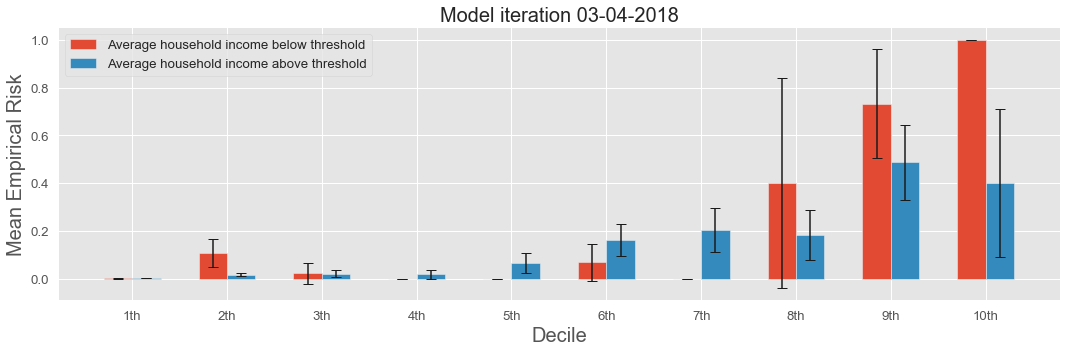

In [1587]:
pd.options.mode.chained_assignment = None 
bar_width = 0.3
lst_colors = ['r','b']
fig, axes = plt.subplots(1,1,figsize=(15,5))
lst_name = []

for i in range(len(lst_f_actual_res)):
    curve_name = (lst_f_actual_res[i]).replace("result_assess/actual_model_result/merged_threshold_", "").replace(".csv", "")
    if (curve_name == "March"):
        curve_name = "03-04-2018"
        df_pred_actual = lst_df_pred_actual[i];
        break

df_riskscore = df_pred_actual
df_riskscore = df_riskscore.loc[:, ['RiskScore'] + ['Actual Fire'] + [i for i in df_riskscore.columns if "Estimate; Total:" in i and "$" in i]].rename(columns={'Actual Fire': 'fire'})
df_riskscore.insert(2, 'Threshold', value=df_pred_actual['thresh'])
df_riskscore = encode_income(df_riskscore)
df_riskscore['group'] = df_riskscore['RiskScore'].apply(lambda x: groupRiskScore(x))

df_riskscore_poor = df_riskscore[df_riskscore['income']==0]
df_riskscore_rich = df_riskscore[df_riskscore['income']==1]

res_poor = df_riskscore_poor.groupby('group')['fire'].mean()
axes.bar(list(res_poor.index-bar_width/2), res_poor, width=bar_width, capsize=5,
       yerr = df_riskscore_poor.groupby('group')['fire'].apply(lambda x: calculateStd(x)*2))

res_rich = df_riskscore_rich.groupby('group')['fire'].mean()
axes.bar(list(res_rich.index+bar_width/2), res_rich, width=bar_width, capsize=5,
       yerr = df_riskscore_rich.groupby('group')['fire'].apply(lambda x: calculateStd(x)*2))

axes.set_xticks(np.arange(1, 11, 1))
axes.set_xticklabels(["%dth"%i for i in axes.get_xticks()])
axes.set_xlabel("Decile", fontsize=fontsize)
axes.set_ylabel("Mean Empirical Risk", fontsize=fontsize)
axes.legend(['Average household income below threshold', 'Average household income above threshold'], ncol=1)
axes.set_title("Model iteration {}".format(curve_name), fontsize=fontsize)
    
plt.tight_layout()
plt.savefig("analysis_plotting/Empirical_Risk_Curve_Commercial_March.pdf")

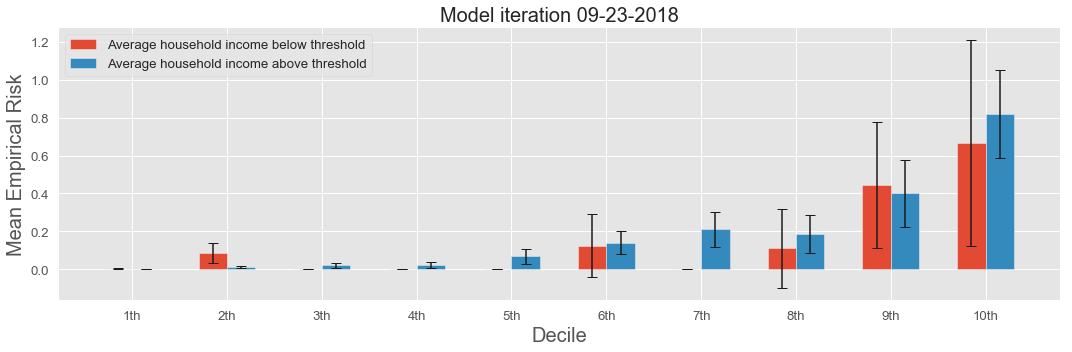

In [1588]:
pd.options.mode.chained_assignment = None 
bar_width = 0.3
lst_colors = ['r','b']
fig, axes = plt.subplots(1,1,figsize=(15,5))
lst_name = []

for i in range(len(lst_f_actual_res)):
    curve_name = (lst_f_actual_res[i]).replace("result_assess/actual_model_result/merged_threshold_", "").replace(".csv", "")
    if (curve_name == "Sept"):
        curve_name = "09-23-2018"
        df_pred_actual = lst_df_pred_actual[i];
        break

df_riskscore = df_pred_actual
df_riskscore = df_riskscore.loc[:, ['RiskScore'] + ['Actual Fire'] + [i for i in df_riskscore.columns if "Estimate; Total:" in i and "$" in i]].rename(columns={'Actual Fire': 'fire'})
df_riskscore.insert(2, 'Threshold', value=df_pred_actual['thresh'])
df_riskscore = encode_income(df_riskscore)
df_riskscore['group'] = df_riskscore['RiskScore'].apply(lambda x: groupRiskScore(x))

df_riskscore_poor = df_riskscore[df_riskscore['income']==0]
df_riskscore_rich = df_riskscore[df_riskscore['income']==1]

res_poor = df_riskscore_poor.groupby('group')['fire'].mean()
axes.bar(list(res_poor.index-bar_width/2), res_poor, width=bar_width, capsize=5,
       yerr = df_riskscore_poor.groupby('group')['fire'].apply(lambda x: calculateStd(x)*2))

res_rich = df_riskscore_rich.groupby('group')['fire'].mean()
axes.bar(list(res_rich.index+bar_width/2), res_rich, width=bar_width, capsize=5,
       yerr = df_riskscore_rich.groupby('group')['fire'].apply(lambda x: calculateStd(x)*2))

axes.set_xticks(np.arange(1, 11, 1))
axes.set_xticklabels(["%dth"%i for i in axes.get_xticks()])
axes.set_xlabel("Decile", fontsize=fontsize)
axes.set_ylabel("Mean Empirical Risk", fontsize=fontsize)
axes.legend(['Average household income below threshold', 'Average household income above threshold'], ncol=1)
axes.set_title("Model iteration {}".format(curve_name), fontsize=fontsize)
    
plt.tight_layout()
plt.savefig("analysis_plotting/Empirical_Risk_Curve_Commercial_Sept.pdf")

In [1591]:
test = df_riskscore_poor[df_riskscore_poor['group'] == 8]

In [1601]:
np.sqrt((test[test['fire'] == 1].shape[0]/test.shape[0] * test[test['fire'] == 0].shape[0]/test.shape[0])/9)

0.10475656017578482

In [1604]:
calculateStd(test['fire'])*2

0.20951312035156963

### Precision at top K

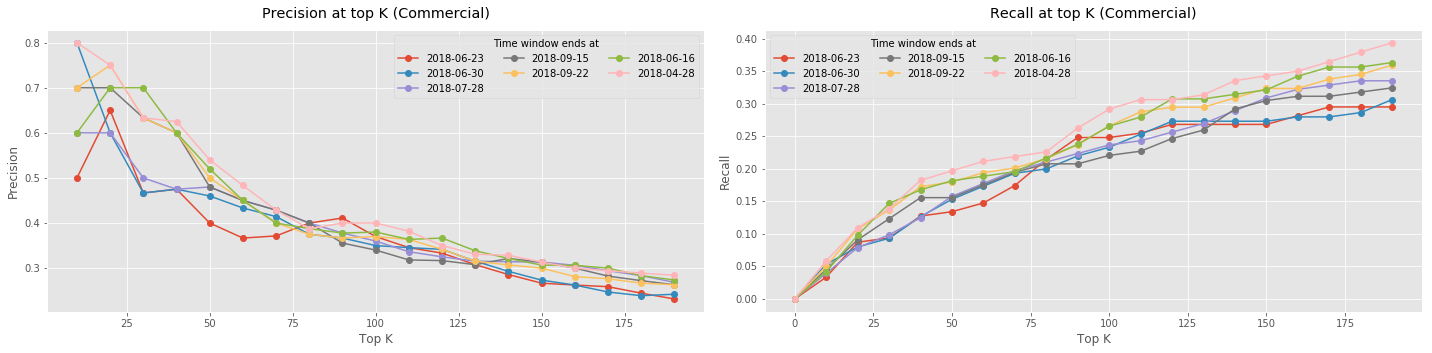

In [244]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
lst_name = []
num = 10

for i in range(len(lst_f_res)):
    curve_name = (lst_f_res[i])[22:-4]
    if (i%5!=0):
        continue
#     if "2018-07" not in curve_name and "2018-02-16" not in curve_name:
#         continue
    lst_name.append(curve_name)
    df_pred = lst_df_pred[i]
    df_truth = lst_df_truth[i]
    df_precision = pd.concat([df_truth['fire'], df_pred[['Fire', 'RiskScore']]], axis=1)
    df_precision = df_precision.rename(columns = {'fire':'fire_truth', 'Fire':'fire_pred', 'RiskScore':'RiskScore'})
    df_precision = df_precision.sort_values(by='RiskScore', ascending=False)
    
    length = df_precision.shape[0]
    group = length//num + 1
    pos_num=0
    lst_prec = []
    lst_recall = []
    lst_topK_prec = []
    lst_topK_recall = []

    for k in range(group):
        if (k==group):
            pos_num = length
            y_label = np.ones((pos_num,1))
            lst_topK.append(pos_num)

        else:
            pos_num = k*num
            y_label = np.concatenate([np.ones((pos_num,1)), np.zeros((length-pos_num,1))], axis=0)

        if pos_num>=200:
            break
        if k==0:
            lst_topK_recall.append(pos_num)
            recall = recall_score(df_precision['fire_truth'], y_label)
            lst_recall.append(recall)
            continue

        lst_topK_prec.append(pos_num)
        prec = precision_score(df_precision['fire_truth'], y_label)
        lst_prec.append(prec)

        lst_topK_recall.append(pos_num)
        recall = recall_score(df_precision['fire_truth'], y_label)
        lst_recall.append(recall)
        
    ax1.plot(lst_topK_prec, lst_prec, marker='o')
    ax2.plot(lst_topK_recall, lst_recall, marker='o')


lst_xtick_prec = [i*num for i in list(range(group)) if i!=0]
# ax1.set_xticks(lst_xtick_prec)

ax1.set_xlabel("Top K")
ax1.set_ylabel("Precision")
ax1.legend(lst_name, title='Time window ends at', ncol=3)

lst_xtick_recall = [i*num for i in list(range(group))]
# ax2.set_xticks(lst_xtick_recall)
ax2.set_xlabel("Top K")
ax2.set_ylabel("Recall")
ax2.legend(lst_name, title='Time window ends at', ncol=3)

ax1.set_title("Precision at top K (Commercial)", y=1.02)
ax2.set_title("Recall at top K (Commercial)", y=1.02)
plt.tight_layout()

plt.savefig("analysis_plotting/Precision_Recall at Top K Curve_Commercial.pdf")

### Jaccard score

In [163]:
lst_f_res.sort()
lst_f_input.sort()
lst_df_pred = []
for filename in lst_f_res:
    df_pred = pd.read_csv(filename)
    lst_df_pred.append(df_pred)
lst_df_truth = []
for filename in lst_f_input:
    df_truth = pd.read_csv(filename)
    lst_df_truth.append(df_truth)

In [164]:
lst_jcd = []

for i in range(len(lst_df_pred)):
    df_pred, df_truth = lst_df_pred[i], lst_df_truth[i]
    y_pred, y_true = df_pred['Fire'], df_truth['fire']
    jcd_score = jaccard_similarity_score(y_true, y_pred, normalize=True, sample_weight=None)
    lst_jcd.append(jcd_score)
    
lst_date = [fn.replace("result_assess/Results_", "").replace(".csv","") for fn in lst_f_res]
lst_date = [datetime.datetime.strptime(date, '%Y-%m-%d').strftime('%m-%d-%y') for date in lst_date]

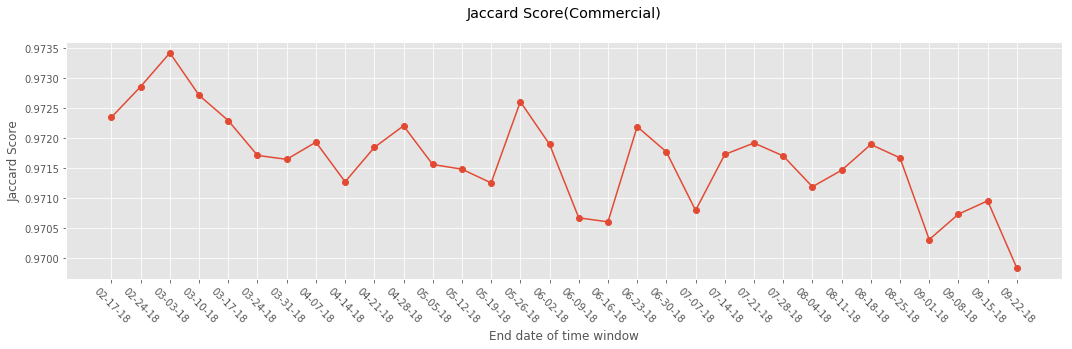

In [165]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(lst_date, lst_jcd, marker='o')
ax.set_xlabel('End date of time window')
ax.set_ylabel('Jaccard Score')
ax.set_xticks(np.arange(len(lst_date)))
ax.set_xticklabels(lst_date, rotation = -45)
ax.set_title("Jaccard Score(Commercial)", y=1.08)
plt.tight_layout()
plt.savefig("analysis_plotting/Jaccard Score Curve_Commercial.pdf")

### Feature Importance 

In [1478]:
lst_f_featureimportance_actual.sort()
lst_df_fi = []
for filename in lst_f_featureimportance_actual:
    df_fi = pd.read_csv(filename,header=None)
    lst_df_fi.append(df_fi)
lst_date = [fn.replace("log_assess/actual_model_performance/FeatureImportanceList_", "")[:10] for fn in lst_f_featureimportance_actual]
# lst_date = [datetime.datetime.strptime(i, "%Y-%m-%d").strftime("%m-%d-%y") for i in lst_date]

In [1226]:
lst_date[0]

'01-05-18'

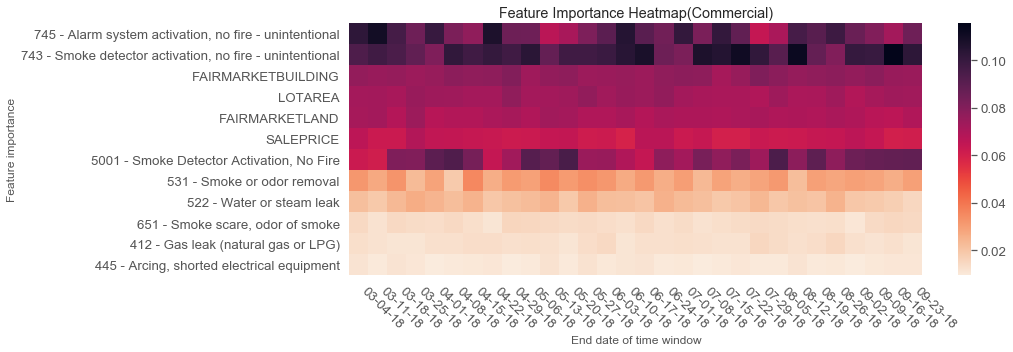

In [1479]:
for idx, df_fi in enumerate(lst_df_fi):
    if (lst_date[idx] < start_date):
        continue
    date_fi = datetime.datetime.strptime(lst_date[idx], "%Y-%m-%d").strftime("%m-%d-%y")
    df_fi = df_fi.rename(columns={0:'feature', 1: date_fi})
    break

for i in range(idx+1, len(lst_df_fi)):
    df = lst_df_fi[i]
    date = datetime.datetime.strptime(lst_date[i], "%Y-%m-%d").strftime("%m-%d-%y")
    df = df.rename(columns={0:'feature', 1: date})
    df_fi = df_fi.merge(df, on='feature')

df_fi['feature'] = df_fi['feature'].apply(lambda x: x.strip())
proportion = 0.4
idx = int(df_fi.shape[0] * proportion)
fig, ax = plt.subplots(1,1,figsize=(15,5))

df_fi = df_fi.set_index('feature')
sns.heatmap(df_fi.iloc[:idx,:], ax = ax, cmap = sns.cm.rocket_r)
ax.set_title("Feature Importance Heatmap(Commercial)")
ax.set_xlabel('End date of time window')
ax.set_ylabel('Feature importance')
plt.xticks(rotation=-45, ha='left') 
plt.tight_layout()
plt.savefig("analysis_plotting/Feature Importance Over Time Heatmap_Commercial.pdf")

In [1525]:
fi = df_fi.iloc[1,:].values

In [1542]:
df_rank = df_fi.rank(ascending=False)

In [1551]:
df_rank

,03-04-18,03-11-18,03-18-18,03-25-18,04-01-18,04-08-18,04-15-18,04-22-18,04-29-18,05-06-18,05-13-18,05-20-18,05-27-18,06-03-18,06-10-18,06-17-18,06-24-18,07-01-18,07-08-18,07-15-18,07-22-18,07-29-18,08-05-18,08-12-18,08-19-18,08-26-18,09-02-18,09-09-18,09-16-18,09-23-18
feature,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"745 - Alarm system activation, no fire - unintentional",1.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,2.0,3.0,6.0,6.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,2.0,6.0,5.0,2.0,1.0,1.0,2.0,3.0,5.0,3.0
"743 - Smoke detector activation, no fire - unintentional",2.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
FAIRMARKETBUILDING,3.0,3.0,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0
LOTAREA,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,3.0,5.0,4.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,6.0,5.0,4.0,5.0
FAIRMARKETLAND,5.0,4.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,4.0,5.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0
SALEPRICE,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
"5001 - Smoke Detector Activation, No Fire",7.0,7.0,3.0,3.0,2.0,2.0,2.0,6.0,5.0,2.0,1.0,2.0,4.0,3.0,6.0,7.0,3.0,5.0,2.0,3.0,3.0,3.0,1.0,3.0,2.0,4.0,3.0,2.0,2.0,2.0
531 - Smoke or odor removal,8.0,8.0,8.0,9.0,8.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
522 - Water or steam leak,9.0,9.0,9.0,8.0,9.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [1570]:
lst_corrs = []
for idx, col in enumerate(df_rank):
#     if (idx == 0):
#         continue
    curr_rank = df_rank[col].values
    last_rank = df_rank.iloc[:,0].values
    corr = pearsonr(curr_rank, last_rank)[0]
    lst_corrs.append(corr)

In [1573]:
pearsonr(lst_corrs, df_performance['f1'])[0]

0.39265604909889223

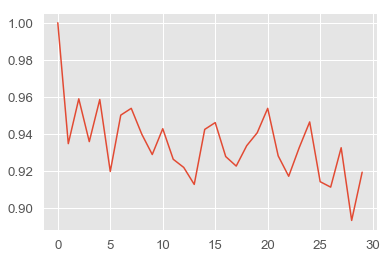

In [1577]:
plt.plot(lst_corrs)

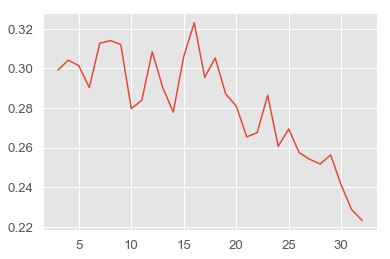

In [1569]:
plt.plot(df_performance['f1'])

In [1529]:
f1 = df_performance['f1'].values

In [1532]:
from scipy.stats.stats import pearsonr
pearsonr(fi, f1)

(-0.19449383974830622, 0.3030580320560338)

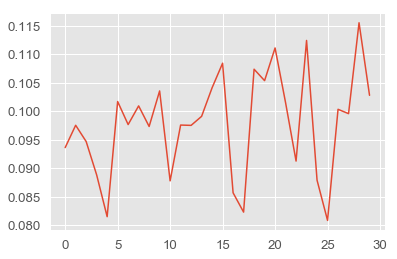

In [1576]:
plt.plot(fi)

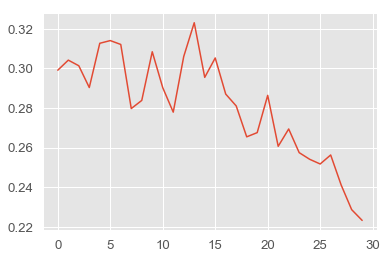

In [1535]:
plt.plot(f1)

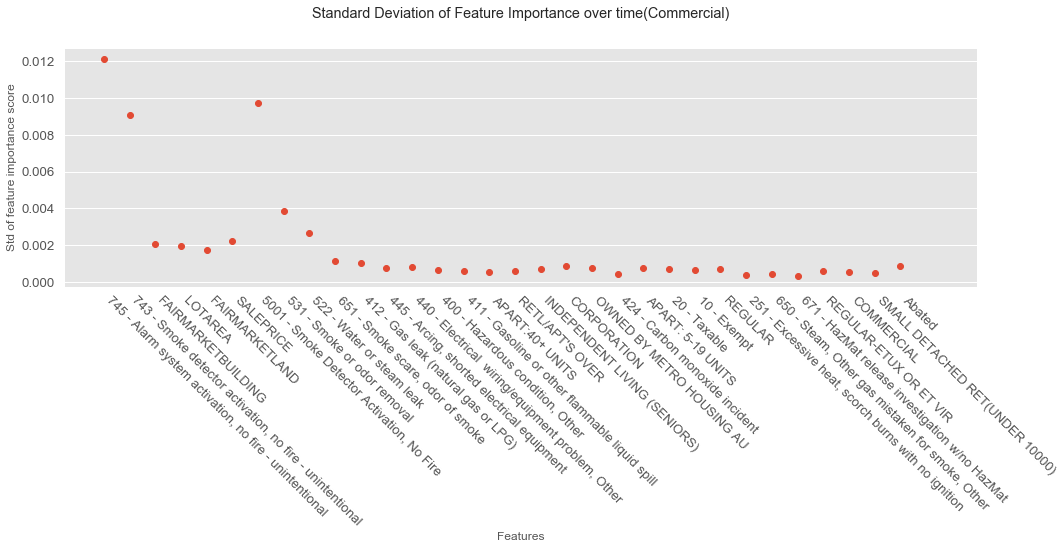

In [1235]:
fig, ax = plt.subplots(1,1,figsize=(15,8))

lst_feature = ['']+list(df_fi.index)
df_fi.std(axis=1).plot(style='o', ax = ax, xticks=[])

ax.set_xticks(np.arange(-1, 35), minor=True)
ax.set_xticklabels(lst_feature, minor=True, rotation=-45, ha='left')
ax.set_title("Standard Deviation of Feature Importance over time(Commercial)", y=1.1)
ax.set_xlabel('Features')
ax.set_ylabel('Std of feature importance score')
plt.tight_layout()
plt.savefig("analysis_plotting/Std of Feature Importance Over Time_Commercial.pdf")

### Risk score over time

In [9]:
lst_f_res.sort()
lst_f_input.sort()
lst_df_pred = []
for filename in lst_f_res:
    df_pred = pd.read_csv(filename)
    lst_df_pred.append(df_pred)

In [10]:
high_risk = 3
medium_risk = 2
low_risk = 1
start_date = "2018-03-04"
lst_high_risk = []
lst_medium_risk = []
lst_low_risk = []

def groupRiskScore(x):
    if (x <= 0.3):
        return low_risk
    elif (x <=0.6):
        return medium_risk
    else:
        return high_risk

for df in lst_df_pred:
    risk_group = df['RiskScore'].apply(lambda x: groupRiskScore(x))
    risk_group_count = risk_group.groupby(risk_group).count()
    risk_group_count = risk_group_count / risk_group_count.sum()
    print(df.shape[0] * 0.0025,
         df.shape[0] * (risk_group_count[medium_risk]),
         df.shape[0] * (risk_group_count[high_risk]))
    lst_high_risk.append(risk_group_count[high_risk])
    lst_medium_risk.append(risk_group_count[medium_risk])
    lst_low_risk.append(risk_group_count[low_risk])

lst_date = []
for i in range(len(lst_f_res)):
    date = (lst_f_res[i])[42:52]
    lst_date.append(date)
lst_name = ['Low Risk Group', 'Medium Risk Group', 'High Risk Group']
df_riskGroup = pd.DataFrame({lst_name[0]: lst_low_risk,
                             lst_name[1]: lst_medium_risk,
                             lst_name[2]: lst_high_risk,
                             "date": lst_date})

df_riskGroup = df_riskGroup[(df_riskGroup['date'] >= start_date)]
df_riskGroup = df_riskGroup.groupby('date').mean().reset_index(drop=False).sort_values('date')

df_riskGroup['date'] = pd.to_datetime(df_riskGroup['date'])
lst_date = [""] + df_riskGroup['date'].dt.strftime('%m-%d-%y').tolist() + [""]

87.69500000000001 451.0 116.0
87.69500000000001 451.0 116.0
87.69500000000001 451.0 116.0
87.7 458.0 112.0
87.7025 449.0 118.0
87.7075 453.0 114.0
87.755 443.0 117.0
52.182500000000005 436.00000000000006 120.0
52.1775 444.00000000000006 114.00000000000001
52.18 442.0 121.0
52.175000000000004 456.0 112.0
52.18 454.0 113.0
52.18 454.0 113.0
52.18 454.0 115.0
52.18 454.0 115.0
52.18 454.0 115.0
52.18 454.0 115.0
52.18 454.0 115.0
52.18 454.0 115.0
52.18 454.0 115.0
52.18 454.0 115.0
52.18 454.0 115.0
52.18 454.0 115.0
52.18 454.0 115.0
52.185 462.0 108.0
52.185 462.0 108.0
52.2 445.0 111.99999999999999
34.8675 465.00000000000006 193.0
34.875 489.00000000000006 181.0
34.875 489.00000000000006 181.0
34.8525 493.99999999999994 169.0
34.8775 488.00000000000006 179.0
34.8775 467.0 183.0
34.8575 489.0 170.0
34.8725 497.99999999999994 176.0
34.88 477.0 176.0
34.875 500.0 178.0
34.8575 514.0 169.0
34.8525 477.00000000000006 192.0
34.855000000000004 479.0 185.0
34.845 491.99999999999994 188.0
34.8

In [1485]:
test = lst_df_pred[0]

In [1490]:
test.shape[0] * (1-0.9525)

1666.2049999999995

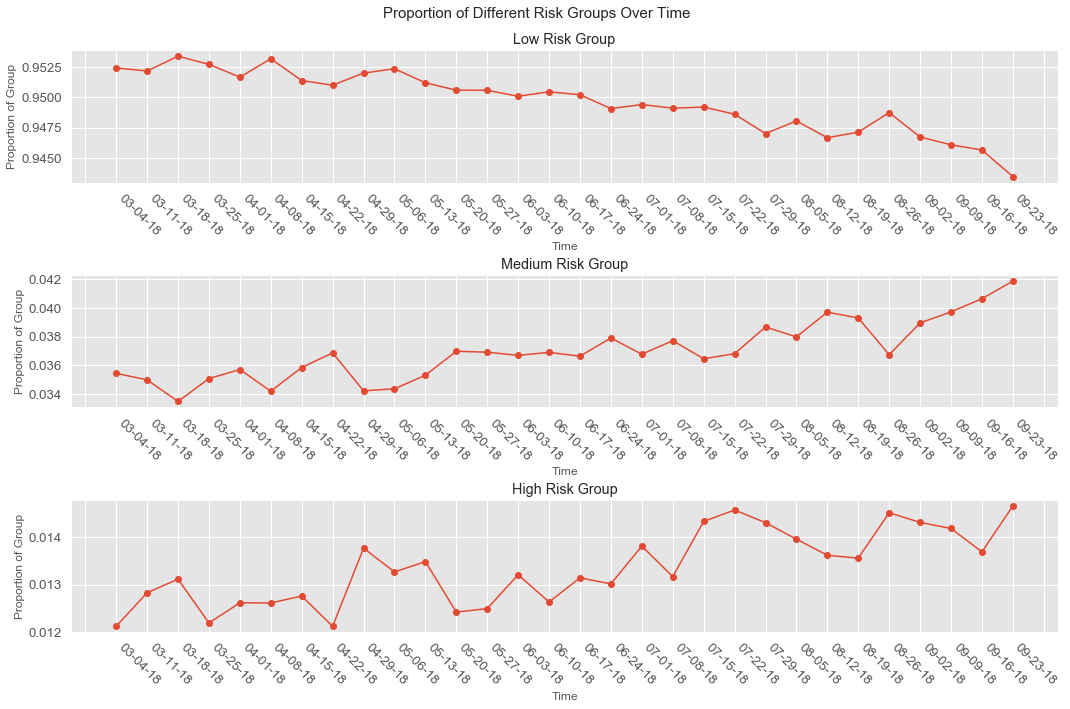

In [1483]:
fig, axes = plt.subplots(3,1, figsize=(15,10))


for idx, ax in enumerate(axes):
    ax.plot(df_riskGroup['date'], df_riskGroup[lst_name[idx]], marker='o')
    ax.set_title(lst_name[idx])
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=SU))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
    ax.xaxis.set_tick_params(rotation=-45)
    ax.set_xticklabels(lst_date, ha='left')
    ax.set_xlabel("Time")
    ax.set_ylabel("Proportion of Group")

fig.suptitle("Proportion of Different Risk Groups Over Time", fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig("analysis_plotting/Risk group distribution Over Time_Commercial.pdf")

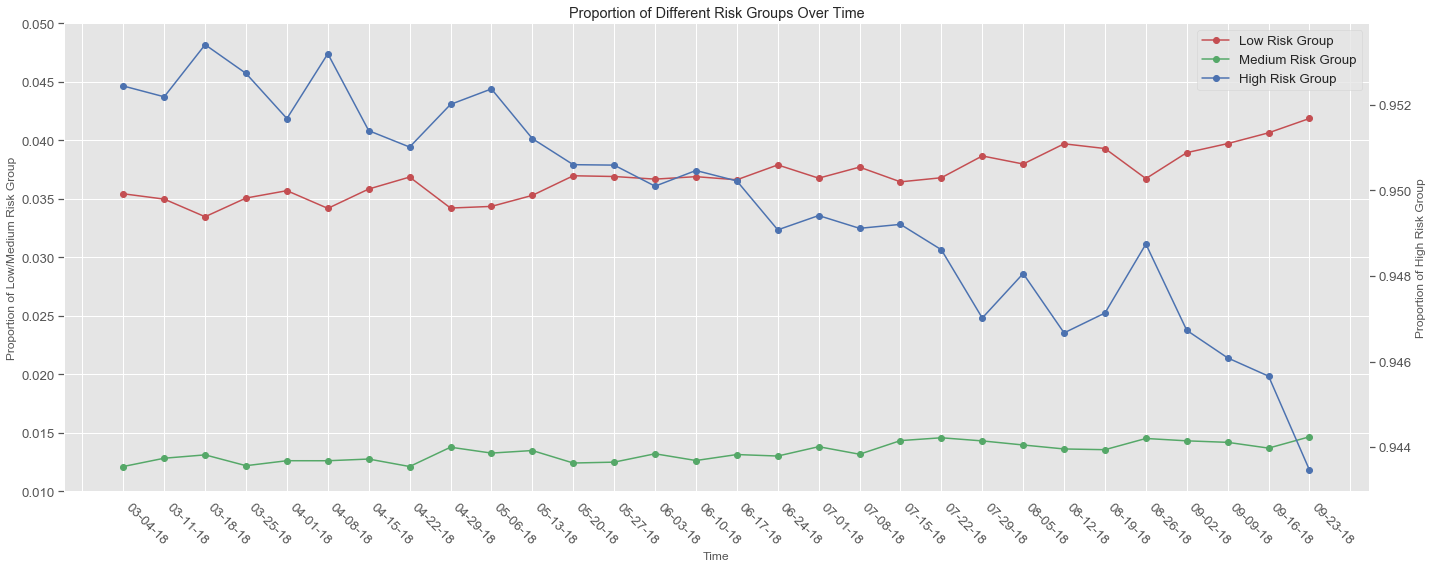

In [1431]:
fig, ax = plt.subplots(1,1, figsize=(20,8))

lns1 = ax.plot(df_riskGroup['date'], df_riskGroup[lst_name[1]], marker='o', color = 'r', label = "Low Risk Group")    
lns2 = ax.plot(df_riskGroup['date'], df_riskGroup[lst_name[2]], marker='o', color = 'g', label = "Medium Risk Group")

ax_high = ax.twinx()
ax_high.grid(False)
lns3 = ax_high.plot(df_riskGroup['date'], df_riskGroup[lst_name[0]], marker='o', color = 'b', label = "High Risk Group")    
ax_high.set_ylabel("Proportion of High Risk Group")
# ax_high.set_ylim([0.85, 0.98])

lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc="upper right")

ax.set_title("Proportion of Different Risk Groups Over Time")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=SU))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.xaxis.set_tick_params(rotation=-45)
ax.set_xticklabels(lst_date, ha='left')
ax.set_xlabel("Time")
ax.set_ylabel("Risk score")
ax.set_ylabel("Proportion of Low/Medium Risk Group")
ax.set_ylim([0.01, 0.05])

plt.tight_layout()
plt.savefig("analysis_plotting/Risk group distribution Over Time_Commercial_OnePlot.pdf")

In [515]:
lst_date = []
for i in range(len(lst_f_res)):
    date = (lst_f_res[i])[47:52]
    lst_date.append(date)
    
df_res_all = None
df_res = lst_df_pred[0]
date = lst_date[0]

df_res_noDup = df_res.drop_duplicates(subset='Address', keep=False)[['Address', 'RiskScore']]
df_res_all = df_res_noDup.rename(columns={'RiskScore': date})

for idx, df_res in enumerate(lst_df_pred):
    if (idx == 0):
        continue
    df_res = lst_df_pred[idx]
    date = lst_date[idx]
    df_res_noDup = df_res.drop_duplicates(subset='Address', keep=False)[['Address', 'RiskScore']]
    df_res_all = df_res_all.merge(df_res_noDup, how='inner', on='Address').rename(columns={'RiskScore': date})

In [488]:
df_res_all = df_res_all.transpose()
df_res_all.columns = df_res_all.iloc[0]
df_res_all = df_res_all.drop(['Address'],axis=0)
df_res_all = df_res_all.rename(columns={'Address': 'date'})
df_res_all.head().columns.name = ""
df_res_all = df_res_all.reset_index().rename(columns={'index':'date'})
df_res_all = df_res_all[(df_res_all['date'] > '02-19') & (df_res_all['date'] <= '09-02')]
df_res_all = df_res_all.drop_duplicates(subset='date').reset_index(drop=True)

In [490]:
lst_two_dates = []
lst_corr = []
for idx , row in df_res_all.iterrows():
    if (idx==0):
        continue 
    lst_two_dates.append(df_res_all.loc[idx-1,'date'] + " with " + row['date'])
    
    last_risk = df_res_all.iloc[idx-1, df_res_all.columns != 'date'].astype('float64')
    curr_risk = row.iloc[row.index != 'date'].astype('float64')
    lst_corr.append(curr_risk.corr(last_risk))

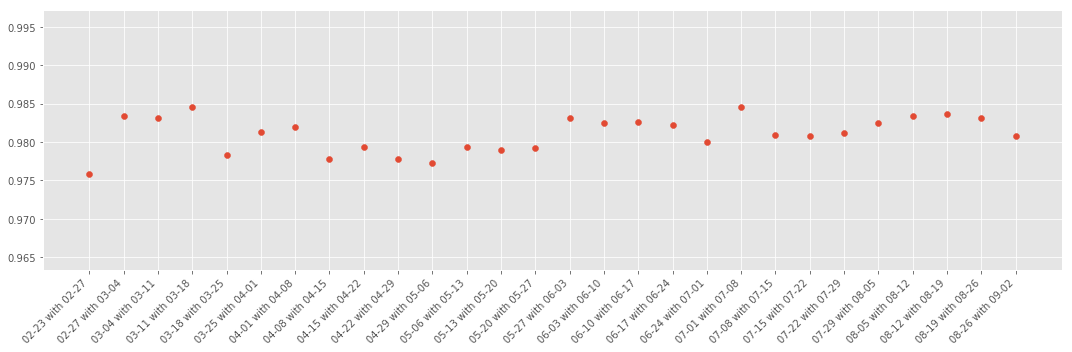

In [493]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.scatter(lst_two_dates, lst_corr)
ax.set_xticklabels(lst_two_dates, rotation=45, ha='right')
ax.set_ylabel('')
plt.tight_layout()
plt.savefig("analysis_plotting/Risk score correlation Over Time_Commercial.pdf")

### Transition probability over time

In [12]:
lst_f_actual_res = glob.glob("result_assess/actual_model_result/Results*.csv")
lst_f_actual_res.sort()
lst_f_input.sort()
lst_df_pred = []
lst_date = []
lst_df_truth = []

for filename in lst_f_actual_res:
    df_pred = pd.read_csv(filename)
    lst_df_pred.append(df_pred)
    
    date = filename[47:52]
    lst_date.append(date)

In [13]:
high_risk = 3
medium_risk = 2
low_risk = 1

def groupRiskScore(x):
    if (x <= 0.3):
        return low_risk
    elif (x <=0.6):
        return medium_risk
    else:
        return high_risk

In [14]:
df_trans_all = pd.DataFrame()
df = lst_df_pred[0]
df_trans = df.groupby('Address', as_index=False)['RiskScore'].max()
df_trans['group'] = df_trans['RiskScore'].apply(lambda x: groupRiskScore(x))
date = lst_date[0]
df_trans_all = df_trans[['Address', 'group']].rename(columns={'group': date})
lst_trans_name = ["Low to Low",
                 "Low to Medium",
                 "Low to High",
                 "Medium to Low",
                 "Medium to Medium",
                 "Medium to High",
                 "High to Low",
                 "High to Medium",
                 "High to High"]

l2h_addrs = set()
h2l_addrs = set()

for idx, df_res in enumerate(lst_df_pred):
    if (idx == 0):
        continue
    df = lst_df_pred[idx]
    df_trans = df.groupby('Address', as_index=False)['RiskScore'].max()
    df_trans['group'] = df_trans['RiskScore'].apply(lambda x: groupRiskScore(x))
    date = lst_date[idx]
    
    df_trans_all = df_trans_all.merge(df_trans[['Address', 'group']], on='Address').rename(columns={'group': date})
    
df_trans_all = df_trans_all.set_index('Address')
df_trans_all = df_trans_all[[col for col in df_trans_all.columns if col > start_date.replace("2018-", "")]]

def get_transit_count(last, curr):
    # Counters
    low2low = 0
    low2medium = 0
    low2high = 0
    medium2low = 0
    medium2medium = 0
    medium2high = 0
    high2low = 0
    high2medium = 0
    high2high = 0
    
    for idx, value in last.iteritems():
        # Previous in low risk group
        if (last[idx] == low_risk):
            # Current in low risk group
            if (curr[idx] == low_risk):
                low2low += 1
            # Current in medium risk group
            elif (curr[idx] == medium_risk):
                low2medium += 1
            # Current in high risk group
            elif (curr[idx] == high_risk):
                low2high += 1
                l2h_addrs.add(idx)
            else:
                print("error")
        # Previous in medium risk group
        elif (last[idx] == medium_risk):
            # Current in low risk group
            if (curr[idx] == low_risk):
                medium2low += 1
            # Current in medium risk group
            elif (curr[idx] == medium_risk):
                medium2medium += 1
            # Current in high risk group
            elif (curr[idx] == high_risk):
                medium2high += 1
            else:
                print("error")
        # Previous in high risk group
        elif (last[idx] == high_risk):
            # Current in low risk group
            if (curr[idx] == low_risk):
                high2low += 1
                h2l_addrs.add(idx)
            # Current in medium risk group
            elif (curr[idx] == medium_risk):
                high2medium += 1
            # Current in high risk group
            elif (curr[idx] == high_risk):
                high2high += 1
            else:
                print("error")
        else:
            print("error")
            
    sum = (low2low + low2medium + low2high + medium2low +  
            + medium2medium + medium2high + high2low + high2medium + high2high)
    
    if (sum != last.shape[0]):
        print("Sum: {}".format(sum))
        print("Shape: {}".format(last.shape[0]))
        print("error")
        
    return (low2low, 
            low2medium, 
            low2high,
            medium2low, 
            medium2medium, 
            medium2high, 
            high2low, 
            high2medium, 
            high2high)

lst_pair_dates = []
lst_trans_ll = []
lst_trans_lm = []
lst_trans_lh = []
lst_trans_ml = []
lst_trans_mm = []
lst_trans_mh = []
lst_trans_hl = []
lst_trans_hm = []
lst_trans_hh = []

for idx, col in enumerate(df_trans_all):
    if (idx == 0):
        continue
        
    (low2low, 
    low2medium, 
    low2high,
    medium2low, 
    medium2medium, 
    medium2high, 
    high2low, 
    high2medium, 
    high2high) = get_transit_count(df_trans_all.iloc[:, idx-1], df_trans_all[col])
    
    lst_trans_ll.append(low2low)
    lst_trans_lm.append(low2medium)
    lst_trans_lh.append(low2high)
    lst_trans_ml.append(medium2low)
    lst_trans_mm.append(medium2medium)
    lst_trans_mh.append(medium2high)
    lst_trans_hl.append(high2low)
    lst_trans_hm.append(high2medium)
    lst_trans_hh.append(high2high)
    
    pair_date = "{} with {}".format(df_trans_all.iloc[:, idx-1].name, df_trans_all[col].name)
    lst_pair_dates.append(pair_date)
    
df_trans_counts = pd.DataFrame({'date': lst_pair_dates,
                                lst_trans_name[0]: lst_trans_ll,
                                lst_trans_name[1]: lst_trans_lm,
                                lst_trans_name[2]: lst_trans_lh,
                                lst_trans_name[3]: lst_trans_ml,
                                lst_trans_name[4]: lst_trans_mm,
                                lst_trans_name[5]: lst_trans_mh,
                                lst_trans_name[6]: lst_trans_hl,
                                lst_trans_name[7]: lst_trans_hm,
                                lst_trans_name[8]: lst_trans_hh})
df_trans_counts = df_trans_counts.set_index('date')
df_trans_counts = df_trans_counts.transpose()
df_trans_counts = df_trans_counts.astype('int')

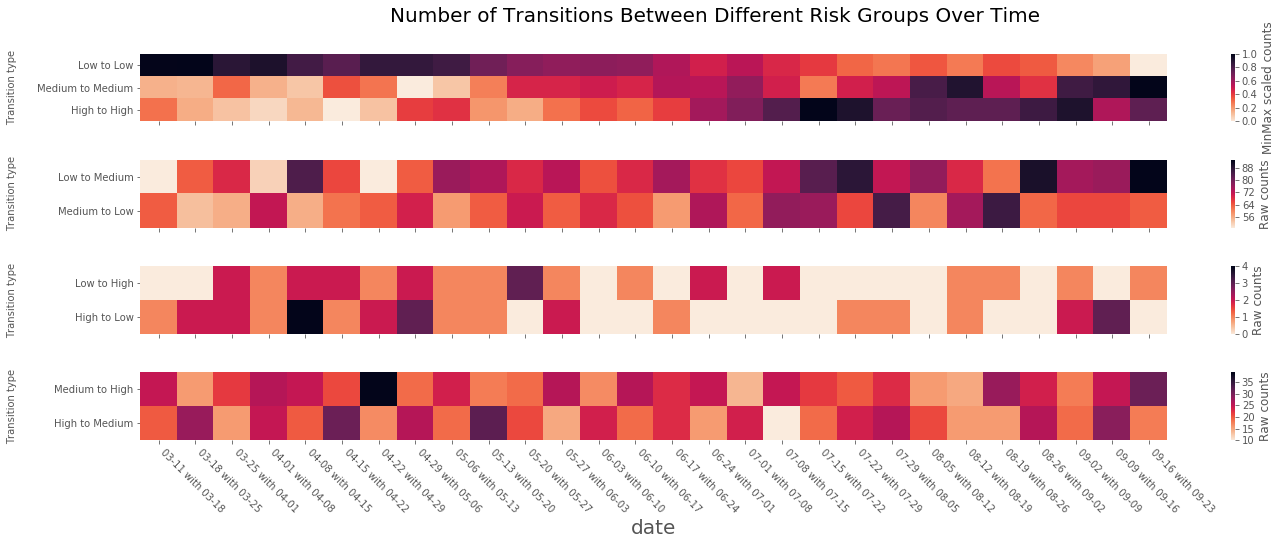

In [18]:
# color = 'gist_heat'
def heatmap_scale_minmax(df, ax):
    ax = sns.heatmap(df.sub(df.min(axis=1), axis=0).divide(df.max(axis=1)- df.min(axis=1), axis=0),
                cmap = sns.cm.rocket_r, 
                ax=ax, cbar_kws={'label': 'MinMax scaled counts'}, )
    
def heatmap_unscale(df, ax, reset_cb_range=False):
    if (reset_cb_range):
        ticks=np.arange(df.values.min(), df.values.max()+1)
        sns.heatmap(df, ax=ax, cbar_kws={'label': 'Raw counts', "ticks": ticks}, cmap = sns.cm.rocket_r)
    else:
        sns.heatmap(df, ax=ax, cbar_kws={'label': 'Raw counts'}, cmap = sns.cm.rocket_r)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(20,2*4))
df_trans_plot = df_trans_counts.loc[[lst_trans_name[0], lst_trans_name[4], lst_trans_name[8]], :]
heatmap_scale_minmax(df_trans_plot, ax1)
# sns.heatmap(df_trans_plot.sub(df_trans_plot.min(axis=1), axis=0).divide(df_trans_plot.max(axis=1)- df_trans_plot.min(axis=1), axis=0), 
#             ax=ax1)

df_trans_plot = df_trans_counts.loc[[lst_trans_name[1], lst_trans_name[3]], :]
heatmap_unscale(df_trans_plot, ax2)
# sns.heatmap(df_trans_plot.sub(df_trans_plot.min(axis=1), axis=0).divide(df_trans_plot.max(axis=1)- df_trans_plot.min(axis=1), axis=0), 
#             ax=ax2)

df_trans_plot = df_trans_counts.loc[[lst_trans_name[2], lst_trans_name[6]], :]
heatmap_unscale(df_trans_plot, ax3, True)
# sns.heatmap(df_trans_plot.sub(df_trans_plot.min(axis=1), axis=0).divide(df_trans_plot.max(axis=1)- df_trans_plot.min(axis=1), axis=0), 
#             ax=ax3)

df_trans_plot = df_trans_counts.loc[[lst_trans_name[5], lst_trans_name[7]], :]
heatmap_unscale(df_trans_plot, ax4)
# sns.heatmap(df_trans_plot.sub(df_trans_plot.min(axis=1), axis=0).divide(df_trans_plot.max(axis=1)- df_trans_plot.min(axis=1), axis=0), 
#             ax=ax4)


ax1.tick_params(labelbottom = False)
ax1.set_xlabel("")
ax1.set_ylabel("Transition type", fontsize=fontsize-10)
ax1.get_yaxis().set_label_coords(-0.12,0.5)

ax2.tick_params(labelbottom = False)
ax2.set_xlabel("")
ax2.set_ylabel("Transition type", fontsize=fontsize-10)
ax2.get_yaxis().set_label_coords(-0.12,0.5)

ax3.tick_params(labelbottom = False)
ax3.set_xlabel("")
ax3.set_ylabel("Transition type", fontsize=fontsize-10)
ax3.get_yaxis().set_label_coords(-0.12,0.5)

ax4.xaxis.label.set_size(fontsize)
ax4.set_xticklabels(lst_pair_dates, rotation = -45, ha='left')
ax4.set_ylabel("Transition type", fontsize=fontsize-10)
ax4.get_yaxis().set_label_coords(-0.12,0.5)
# ax4.set_xlabel("date", fontsize=fontsize)
fig.suptitle("Number of Transitions Between Different Risk Groups Over Time", fontsize=fontsize, y=0.97)
plt.tight_layout()
# plt.subplots_adjust(top=0.9)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("analysis_plotting/RiskGroupTransition_Commercial.pdf")

In [1466]:
lst_l2h_addrs = list(l2h_addrs)
lst_h2l_addrs = list(h2l_addrs) 

In [1473]:
with open('Low2High&High2Low_Addresses.txt', 'w') as f:
    f.write("Low to High addresses({} in total):\n".format(len(l2h_addrs)))
    for item in l2h_addrs:
        f.write("%s\n" % item)
    f.write("\nHigh to Low addresses({} in total):\n".format(len(h2l_addrs)))
    for item in h2l_addrs:
        f.write("%s\n" % item)

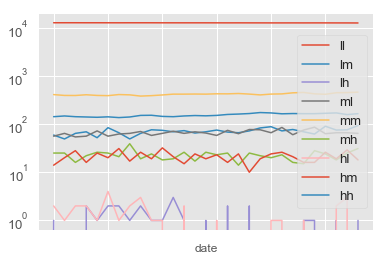

In [812]:
df_trans_counts.transpose().plot(logy = True)

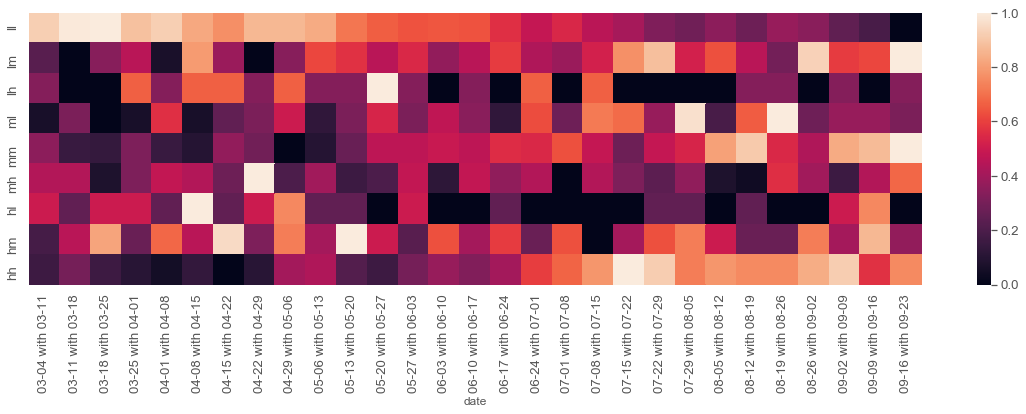

In [767]:
fig, ax = plt.subplots(1,1, figsize=(20,5))

sns.heatmap(df_trans_counts.sub(df_trans_counts.min(axis=1), axis=0).divide(df_trans_counts.max(axis=1)- df_trans_counts.min(axis=1), axis=0), 
            ax=ax)


### Roc Curve

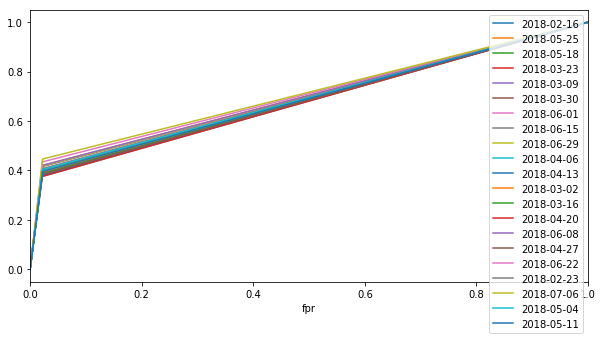

In [120]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

for i in range(len(lst_df_roc)):
    df_roc = lst_df_roc[i].drop(['Unnamed: 0'], axis=1)
    lst_date = [fn.replace("roc_assess/roc_", "").replace(".csv","") for fn in lst_f_roc]

    date = lst_date[i]
    df_roc.plot(x='fpr',y='tpr', ax=ax, label=date)


In [123]:
roc_curve(y_true, y_pred, pos_label=1)

(array([ 0.        ,  0.02228493,  1.        ]),
 array([ 0.        ,  0.44604317,  1.        ]),
 array([ 2.,  1.,  0.]))

### Transferability

We measure the transferability of model signature from very first time window to very end of time window.

In [6]:
lst_f_res.sort()
lst_f_input.sort()
lst_df_pred = []
for filename in lst_f_res:
    df_pred = pd.read_csv(filename)
    lst_df_pred.append(df_pred)
# lst_df_truth = []
# for filename in lst_f_input:
#     df_truth = pd.read_csv(filename)
#     lst_df_truth.append(df_truth)

In [17]:
df_ini = lst_df_pred[0]
df_pair = lst_df_pred[1]

In [18]:
df_ini = df_ini.drop(['Unnamed: 0'], axis=1)
df_pair = df_pair.drop(['Unnamed: 0'], axis=1)

In [26]:
key_lst = [i for i in df_ini.columns if i not in ['Fire', 'RiskScore']]

In [35]:
(df_ini.merge(df_pair, on=key_lst)).shape

(18209, 12)

In [31]:
df_ini.shape, df_pair.shape

((13958, 10), (13966, 10))

In [39]:
display(df_ini.head()), display(df_pair.head())

,Address,Fire,RiskScore,muni_desc,neigh_desc,owner_desc,school_desc,state_desc,tax_desc,use_desc
0,1 ALGER ST,0.0,0.006490,15th Ward - PITTSBURGH,51C84,CORPORATION,City Of Pittsburgh,GOVERNMENT,10 - Exempt,OWNED BY BOARD OF EDUCATION
1,1 ALLEGHENY AVE,0.0,0.003154,21st Ward - PITTSBURGH,51C14,CORPORATION,City Of Pittsburgh,GOVERNMENT,10 - Exempt,OWNED BY COLLEGE/UNIV/ACADEMY
2,1 BIGELOW SQ,0.0,0.001846,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS
3,1 BIGELOW SQ,0.0,0.141260,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS
4,1 BIGELOW SQ,0.0,0.003794,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS


,Address,Fire,RiskScore,muni_desc,neigh_desc,owner_desc,school_desc,state_desc,tax_desc,use_desc
0,1 ALGER ST,0.0,0.007787,15th Ward - PITTSBURGH,51C84,CORPORATION,City Of Pittsburgh,GOVERNMENT,10 - Exempt,OWNED BY BOARD OF EDUCATION
1,1 BIGELOW SQ,0.0,0.001612,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS
2,1 BIGELOW SQ,0.0,0.148396,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS
3,1 BIGELOW SQ,0.0,0.002228,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS
4,1 BIGELOW SQ,0.0,0.002228,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS


(None, None)

In [54]:
df_ini.reset_index().merge(df_pair.reset_index(), on=key_lst).head()

,index_x,Address,Fire_x,RiskScore_x,muni_desc,neigh_desc,owner_desc,school_desc,state_desc,tax_desc,use_desc,index_y,Fire_y,RiskScore_y
0,0,1 ALGER ST,0.0,0.006490,15th Ward - PITTSBURGH,51C84,CORPORATION,City Of Pittsburgh,GOVERNMENT,10 - Exempt,OWNED BY BOARD OF EDUCATION,0,0.0,0.007787
1,1,1 ALLEGHENY AVE,0.0,0.003154,21st Ward - PITTSBURGH,51C14,CORPORATION,City Of Pittsburgh,GOVERNMENT,10 - Exempt,OWNED BY COLLEGE/UNIV/ACADEMY,1320,1.0,0.744679
2,2,1 BIGELOW SQ,0.0,0.001846,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS,1,0.0,0.001612
3,2,1 BIGELOW SQ,0.0,0.001846,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS,2,0.0,0.148396
4,2,1 BIGELOW SQ,0.0,0.001846,2nd Ward - PITTSBURGH,51C01,CORPORATION,City Of Pittsburgh,COMMERCIAL,20 - Taxable,HOTELS,3,0.0,0.002228


In [50]:
df2 = pd.DataFrame({'Key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data2': range(7)})
df1 = pd.DataFrame({'Key': ['a', 'b', 'd'], 'data1': range(3)})

In [51]:
display(df1,df2)

,Key,data1
0,a,0
1,b,1
2,d,2


,Key,data2
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [52]:
pd.concat([df1, df2], axis=1)

,Key,data1,Key,data2
0,a,0.0,b,0
1,b,1.0,b,1
2,d,2.0,a,2
3,NaN,NaN,c,3
4,NaN,NaN,a,4
5,NaN,NaN,a,5
6,NaN,NaN,b,6


In [335]:
lst_prec

[]

In [331]:
y_label = np.concatenate([np.ones((100,1)), np.zeros((length-100,1))], axis=0)
precision_score(df_precision['fire_truth'], y_label)

0.34000000000000002

### ARIMA modeling for metrics

Here is the reference [link](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/). We **Assume** there is a trend in metrics along time axis and we take difference order as 1.

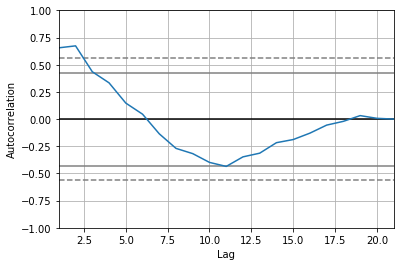

In [31]:
autocorrelation_plot(df_performance['auc'])

In [29]:
# fit model
# df_performance = df_performance.set_index('date')
model = ARIMA(df_performance['accuracy'], order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.accuracy   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 119.280
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 11 Jul 2018   AIC                           -230.559
Time:                        23:34:17   BIC                           -226.577
Sample:                             1   HQIC                          -229.782
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.485e-05   2.06e-05     -0.722      0.480   -5.52e-05    2.55e-05
ar.L1.D.accuracy    -0.0254      0.239     -0.106      0.917      -0.495       0.444
ma.L1.D.accuracy    -0.9998      0.147     -6.789      0.000      -1.288      -0.711
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -39.3205           +0.0000j           39.3205            0.5000
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

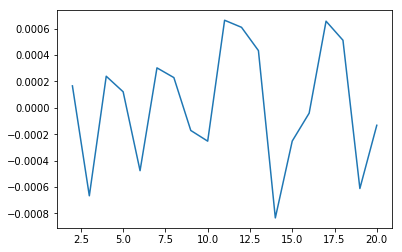

In [24]:
plt.plot(model_fit.predict())

In [35]:
model = ARIMA(df_performance['auc'], order=(2,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.auc   No. Observations:                   20
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  77.319
Method:                       css-mle   S.D. of innovations              0.005
Date:                Wed, 11 Jul 2018   AIC                           -144.638
Time:                        23:48:23   BIC                           -139.659
Sample:                             1   HQIC                          -143.666
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0008      0.001      1.297      0.213      -0.000       0.002
ar.L1.D.auc     0.3781      0.212      1.787      0.093      -0.037       0.793
ar.L2.D.auc     0.5745      0.209      2.746      0.014       0.164       0.984
ma.L1.D.auc    -1.0000      0.073    -13.669      0.000      -1.143      -0.857
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0307           +0.0000j            1.0307            0.0000
AR.2           -1.6889           +0.0000j            1.6889            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

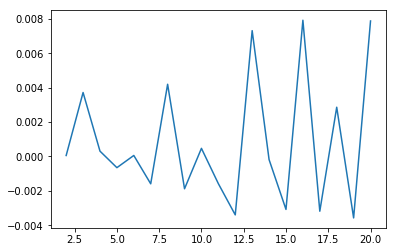

In [26]:
plt.plot(model_fit.predict())